**Desafio_04:**

Usar como base os notebooks apresentados em aula (02_asl.ipynb e 03_asl_cnn.ipynb) para classificar um dataset diferente do apresentado em aula e comparar a diferença de performance dos modelos ao usar as abordagens de ML e DL no mesmo problema. Lembrem de comentar o notebook informando o que está acontecendo!
Anexar os notebooks desenvolvidos na tarefa.

**Primerio modelo:**

Utilizando a abordagem de Machine Learning

Para realizar a análise e comparar as abordagens de Machine Learning (ML) e Deep Learning (DL) no mesmo problema, vamos seguir estas etapas:

Exploração Inicial dos Dados:

Carregar o dataset.
Visualizar as primeiras linhas para entender sua estrutura.
Identificar tipos de dados, valores ausentes e distribuição de variáveis.


In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



FileNotFoundError: [Errno 2] No such file or directory: 'laptop-price.csv'

In [2]:
#carregar o dataset no google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Carregar o dataset

data = pd.read_csv('/content/drive/MyDrive/Classroom/PROGRAMAÇÃO PARA APRENDIZAGEM DE MÁQUINA Prof. Cleber Zanchettin - Pós-Graduação em Ciência de Dados/desafio_04/data/data_raw/laptop-price.csv')

# Explorar o dataset
print("Resumo do dataset:")
print(data.info())
print("\nPrimeiras linhas do dataset:")
print(data.head())

Resumo do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1268 non-null   int64  
 1   Company        1268 non-null   object 
 2   TypeName       1268 non-null   object 
 3   Ram            1268 non-null   int64  
 4   Weight         1268 non-null   float64
 5   Price          1268 non-null   float64
 6   Touchscreen    1268 non-null   int64  
 7   Ips            1268 non-null   int64  
 8   ppi            1268 non-null   float64
 9   Cpu brand      1268 non-null   object 
 10  HDD            1268 non-null   int64  
 11  SSD            1268 non-null   int64  
 12  Hybrid         1268 non-null   int64  
 13  Flash_Storage  1268 non-null   int64  
 14  Gpu brand      1268 non-null   object 
 15  os             1268 non-null   object 
dtypes: float64(3), int64(8), object(5)
memory usage: 158.6+ KB
None

Primeiras li

**Pré-processamento:**

Lidar com valores ausentes.
Converter variáveis categóricas em valores numéricos.
Normalizar os dados, se necessário.

In [6]:
# Transformar variáveis categóricas em numéricas
categorical_columns = data.select_dtypes(include='object').columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)




**Definição do Problema:**

Escolher a variável alvo.
Dividir os dados em treinamento e teste.

In [7]:
# Separar variável alvo e variáveis independentes
X = data_encoded.drop(columns=['Price', 'index'])
y = data_encoded['Price']


# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Separar e mostrar as quantidades dos conjuntos de dados de treinamento e teste
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Visualizar distribuicao dos dados:**

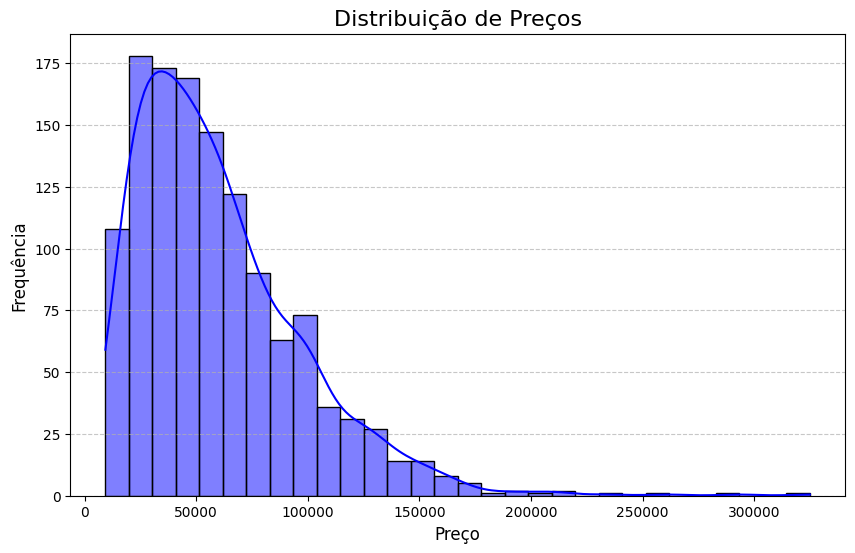

In [18]:
# Analisar a distribuição da variável alvo
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, bins=30, color='blue')
plt.title('Distribuição de Preços', fontsize=16)
plt.xlabel('Preço', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Construção de Modelos:**

Treinar um modelo de ML (ex.: Random Forest).


In [8]:
# Modelo de Machine Learning: Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_predictions = rf.predict(X_test_scaled)

**Avaliação de Performance:**

Avaliar ambos os modelos em termos de métricas como R², MAE ou MSE (para problemas de regressão) ou F1-Score, AUC (para classificação).

In [9]:
# Avaliar o modelo de ML
print("Random Forest Metrics:")
print(f"MAE: {mean_absolute_error(y_test, rf_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, rf_predictions):.2f}")
print(f"R2 Score: {r2_score(y_test, rf_predictions):.2f}\n")

Random Forest Metrics:
MAE: 9206.79
MSE: 216613858.56
R2 Score: 0.85



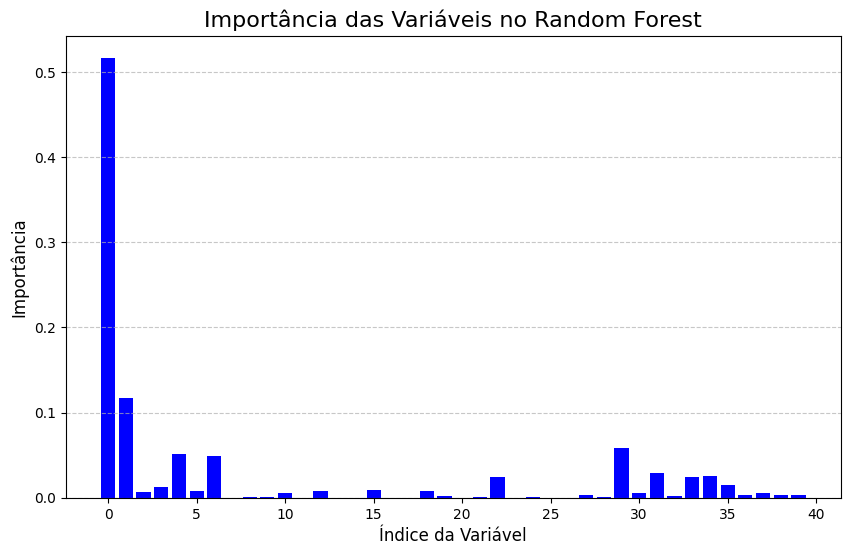

In [17]:
# Plotar a evolução do treinamento do Random Forest
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_, color='blue')
plt.title('Importância das Variáveis no Random Forest', fontsize=16)
plt.xlabel('Índice da Variável', fontsize=12)
plt.ylabel('Importância', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()